# **AI and CV Project - Binary Classification on ‘Customer_Churn’using Keras**

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
customer = pd.read_csv("customer_churn.csv")

In [220]:
customer.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True) 
customer.TotalCharges.replace([" "], ["0"], inplace= True) 
customer.TotalCharges = customer.TotalCharges.astype(float) 
customer.drop("customerID", axis= 1, inplace= True) 
customer.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

# **A) Data Manipulation:**

**a.** Find the total number of male customers


In [111]:
sum(customer['gender']=="Male")

3555

**b.** Find the total number of customers whose Internet Service is ‘DSL’


In [112]:
sum(customer["InternetService"] == "DSL")


2421

**c.** Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’


In [113]:
new_customer = customer[(customer["SeniorCitizen"] == 1) & (customer["gender"] == "Female") & (customer["PaymentMethod"] == "Mailed check")]

**d.** Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [119]:
new_customer1 = customer[(customer['tenure'] < 10) | (customer['TotalCharges'] < 500)] 

In [120]:
new_customer1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,Female,Yes,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7030,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0
7032,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


# **B) Data Visualization:**



**a.** Build a pie-chart to show the distribution of customers would be churning out

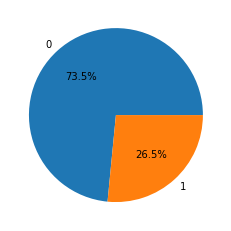

In [121]:
names = customer["Churn"].value_counts().keys().tolist()
sizes= customer["Churn"].value_counts().tolist() 
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show() 

**b.** Build a bar-plot to show the distribution of ‘Internet Service’

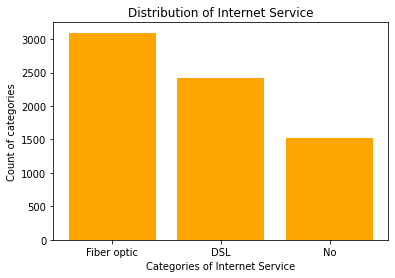

In [122]:
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show() 

# **C) Model Building:**

**a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:**

In [221]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 

In [222]:
x = customer[['tenure']]
y = customer[['Churn']] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

**i.** The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

In [223]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))

**ii.** This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

In [224]:
model.add(Dense(8, activation='relu'))

In [225]:
model.add(Dense(1, activation='sigmoid')) 

**iii.** Use ‘Adam’ as the optimization algorithm

In [226]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**iv.** Fit the model on the train set, with number of epochs to be 150

In [227]:
model_history = model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 [==============================] - 1s 2ms/step - loss: 0.9929 - accuracy: 0.7422 - val_loss: 0.5108 - val_accuracy: 0.7511
Epoch 2/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7554 - val_loss: 0.5101 - val_accuracy: 0.7549
Epoch 3/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7527 - val_loss: 0.5108 - val_accuracy: 0.7549
Epoch 4/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7542 - val_loss: 0.5144 - val_accuracy: 0.7539
Epoch 5/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.7515 - val_loss: 0.5111 - val_accuracy: 0.7553
Epoch 6/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7465 - val_loss: 0.5114 - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.7373 - val_loss: 0.5101 - val_accuracy: 0.7283

**v.** Predict the values on the test set and build a confusion matrix

In [189]:
y_pred = model.predict(x_test, verbose=0)

In [192]:
y_test.shape

(2113,)

In [193]:
y_pred.shape

(2113, 1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred) 

**vi.** Plot the ‘Accuracy vs Epochs’ graph


In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(model_history.history.get('acc'), label="Acc")
plt.plot(model_history.epoch, label="Val Acc")
plt.legend()
plt.show()

**b. Build the 2nd model using same target and feature variables:**



In [198]:
model1 = Sequential()

**i.** Add a drop-out layer after the input layer with drop-out value of 0.3 

In [201]:
model1.add(Dense(12, input_dim=1, activation='relu'))
model1.add(Dropout(0.3))

**ii.** Add a drop-out layer after the hidden layer with drop-out value of 0.2


In [202]:
model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid')) 

**iii.** Predict the values on the test set and build a confusion matrix


In [205]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
model_history1 = model1.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

In [208]:
y_pred1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

**iv.** Plot the ‘Accuracy vs Epochs’ graph

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(model_history1.history.get('acc'), label="Acc")
plt.plot(model_history1.epoch, label="Val Acc")
plt.legend()
plt.show()

**c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:**

In [228]:
x = customer[['tenure','MonthlyCharges','TotalCharges']]
y = customer[['Churn']] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

**i.** The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

In [ ]:
model2 = Sequential()
model2.add(Dense(12, input_dim=3, activation='relu'))

**ii.** This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

In [ ]:
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

**iii.** Use ‘Adam’ as the optimization algorithm

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**iv.** Fit the model on the train set, with number of epochs to be 150

In [ ]:
model_history2 = model2.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

**v.** Predict the values on the test set and build a confusion matrix 

In [ ]:
y_pred = model2.predicts(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred) 

**vi.** Plot the ‘Accuracy vs Epochs’ graph

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(model_history2.history.get('acc'), label="Acc")
plt.plot(model_history2.epoch, label="Val Acc")
plt.legend()
plt.show()